# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis
* My biggest takeaway is that confirmation that latitude only really has an impact on temperatures.  The data doesn't provide enough evidence to proove that dryness changes via latitude, after all, there are deserts present at almost every latitudinal level as well as rainforests.
* I was able to pick out a trend in the wind chart.  There are some latitudes where windspeeds peak, after further research the latitudes have well known mountain ranges, and this could easily contribute to that trend.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

api_key = '2b4a53e0d5b755b7b07c6f34b41e1a3e'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cloudiness = []
date = []
humidity = []
country = []
city_list = []
lat = []
lng = []
temp = []
wind = []
index_count = 0
count = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_count > 49:
            index_count = 0
            count = count + 1
    
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {count} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : dinghai
Processing Record 2 of Set 1 : avarua
Processing Record 3 of Set 1 : san andres
Processing Record 4 of Set 1 : ushuaia
Processing Record 5 of Set 1 : ayna
Processing Record 6 of Set 1 : alenquer
Processing Record 7 of Set 1 : bluff
Processing Record 8 of Set 1 : punta arenas
Processing Record 9 of Set 1 : santa maria
City not found. Skipping...
Processing Record 10 of Set 1 : khatanga
Processing Record 11 of Set 1 : hobart
Processing Record 12 of Set 1 : radviliskis
Processing Record 13 of Set 1 : dingle
Processing Record 14 of Set 1 : garowe
Processing Record 15 of Set 1 : upernavik
Processing Record 16 of Set 1 : santa ana
Processing Record 17 of Set 1 : san quintin
Processing Record 18 of Set 1 : mataura
City not found. Skipping...
Processing Record 19 of Set 1 : salo
Processing Record 20 of Set 1 : ribeira grande
Processing Record 21 of Set 1 : san francisco
Processing Record 22 of Set 1 

Processing Record 33 of Set 4 : pangnirtung
Processing Record 34 of Set 4 : norman wells
Processing Record 35 of Set 4 : stow
Processing Record 36 of Set 4 : san fernando
Processing Record 37 of Set 4 : katsuura
Processing Record 38 of Set 4 : grand gaube
Processing Record 39 of Set 4 : narsaq
Processing Record 40 of Set 4 : vestmannaeyjar
Processing Record 41 of Set 4 : dakoro
Processing Record 42 of Set 4 : tilichiki
Processing Record 43 of Set 4 : xacmaz
Processing Record 44 of Set 4 : pevek
Processing Record 45 of Set 4 : torbay
Processing Record 46 of Set 4 : hambantota
Processing Record 47 of Set 4 : sumbe
Processing Record 48 of Set 4 : richards bay
City not found. Skipping...
Processing Record 49 of Set 4 : bambanglipuro
Processing Record 50 of Set 4 : mehamn
Processing Record 0 of Set 5 : klaksvik
Processing Record 1 of Set 5 : develi
Processing Record 2 of Set 5 : beloha
Processing Record 3 of Set 5 : gafanha da encarnacao
Processing Record 4 of Set 5 : carahue
Processing Rec

Processing Record 15 of Set 8 : yuci
Processing Record 16 of Set 8 : rivne
Processing Record 17 of Set 8 : caceres
Processing Record 18 of Set 8 : hofn
City not found. Skipping...
Processing Record 19 of Set 8 : salalah
Processing Record 20 of Set 8 : lososina
Processing Record 21 of Set 8 : trincomalee
Processing Record 22 of Set 8 : mutoko
Processing Record 23 of Set 8 : panlaitan
Processing Record 24 of Set 8 : sioux lookout
Processing Record 25 of Set 8 : sao domingos do prata
Processing Record 26 of Set 8 : puerto narino
Processing Record 27 of Set 8 : mamlyutka
Processing Record 28 of Set 8 : dalby
Processing Record 29 of Set 8 : diego de almagro
Processing Record 30 of Set 8 : grindavik
Processing Record 31 of Set 8 : san cristobal
Processing Record 32 of Set 8 : nantucket
Processing Record 33 of Set 8 : valparaiso
Processing Record 34 of Set 8 : teya
Processing Record 35 of Set 8 : zhanaozen
Processing Record 36 of Set 8 : muros
Processing Record 37 of Set 8 : half moon bay
Pro

Processing Record 46 of Set 11 : graciano sanchez
City not found. Skipping...
Processing Record 47 of Set 11 : saint-augustin
Processing Record 48 of Set 11 : fomboni
Processing Record 49 of Set 11 : calabazar de sagua
Processing Record 50 of Set 11 : constantine
Processing Record 0 of Set 12 : tadpatri
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create a panda data frame using data retrieved
final_weather_df = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : temp,
                "Wind Speed" : wind
})

In [7]:
final_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dinghaicun,40,CN,1592632300,79,26.28,119.79,84.20,6.71
1,Avarua,77,CK,1592632300,64,-21.21,-159.78,71.60,8.05
2,San Andrés,20,CO,1592632301,79,12.58,-81.70,84.20,9.17
3,Ushuaia,99,AR,1592632188,93,-54.80,-68.30,35.60,4.70
4,Ayna,35,PE,1592632303,74,-12.65,-73.92,58.91,1.83
...,...,...,...,...,...,...,...,...,...
556,Saint-Augustin,88,CA,1592632570,95,51.23,-58.65,41.97,3.78
557,Fomboni,92,KM,1592632570,82,-12.28,43.74,76.75,23.15
558,Calabazar de Sagua,40,CU,1592632571,94,22.64,-79.90,75.20,2.24
559,Constantine,0,DZ,1592632571,81,36.37,6.61,53.60,2.24


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
final_weather_df.to_csv("weather_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

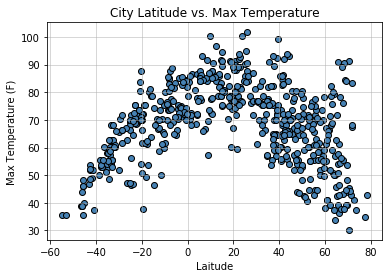

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

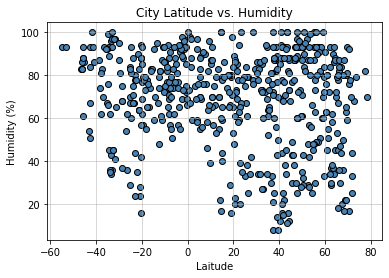

In [12]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

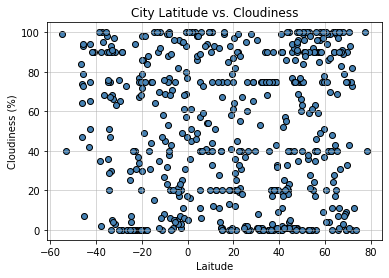

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

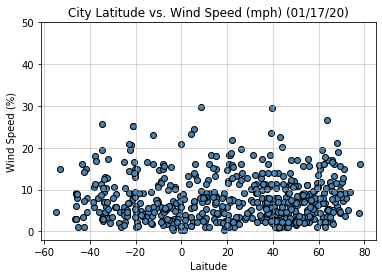

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(final_weather_df["Lat"], final_weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = final_weather_df.loc[final_weather_df["Lat"] >= 0]
southern_hemisphere = final_weather_df.loc[final_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
def linear_agression(x,y):

In [ ]:
# i tried seeveral different ideas, none returned a working answer

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression